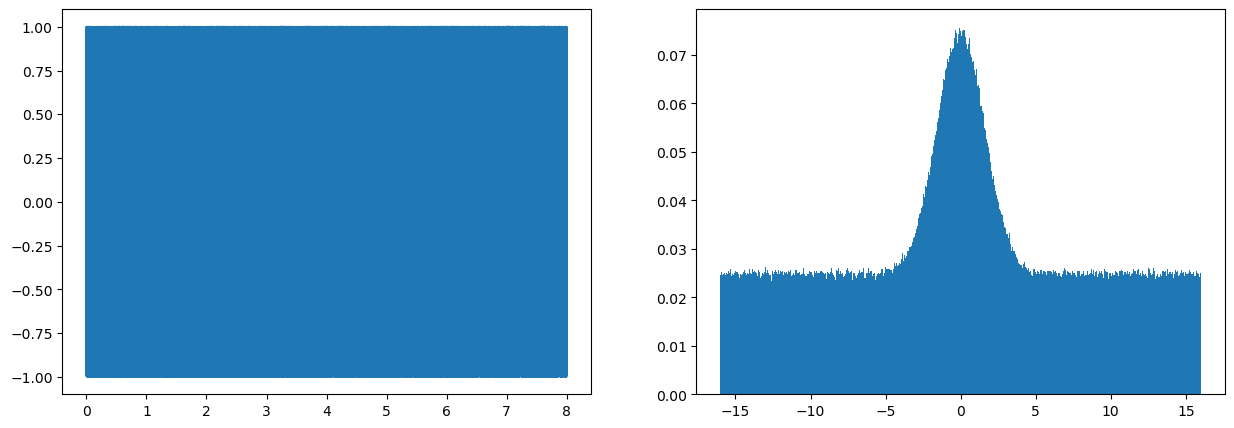

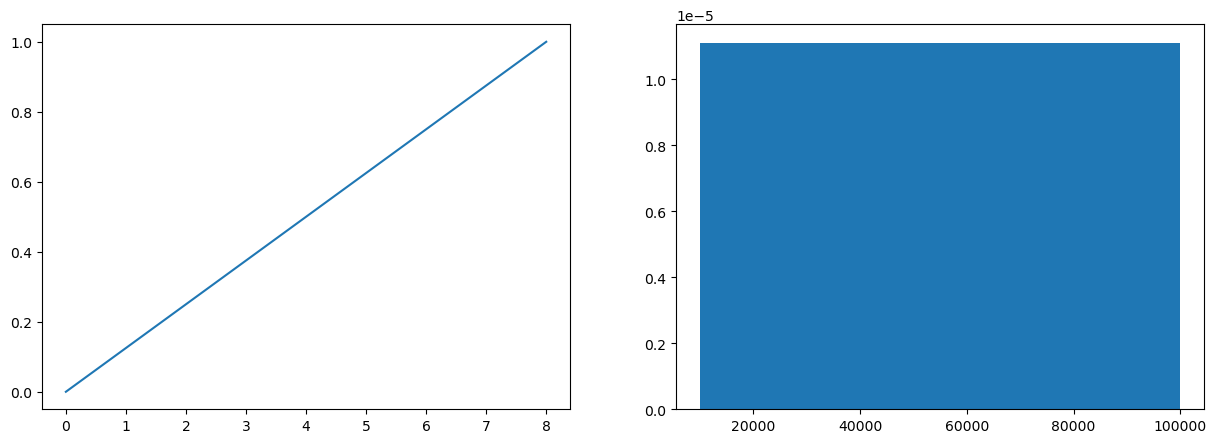

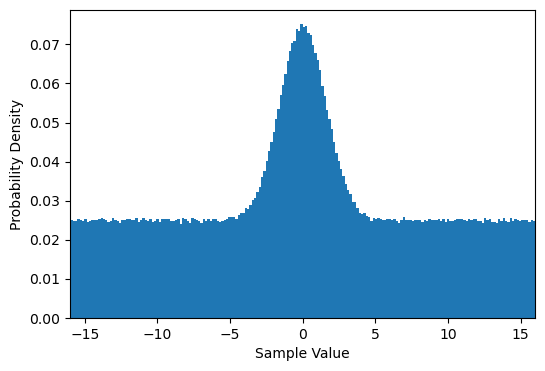

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write


def uniform_noise_generate(N: int = 5000, fs: int = 192000, amp=1.0):
    T = 1 / fs
    x = np.random.uniform(-amp, amp, N)
    t_axis = np.linspace(0, T * (N-1), N)
    return x, t_axis


def gaussian_noise_generate(N: int = 5000, fs: int = 192000, mean=0.0, std=1.0, amp=1.0):
    T = 1 / fs
    x = np.random.normal(loc=mean, scale=std, size=N)
    
    out_of_bounds = np.where((x > 1) | (x < -1))[0]
    while out_of_bounds.size > 0:
        x[out_of_bounds] = np.random.normal(loc=mean, scale=std, size=out_of_bounds.size)
        out_of_bounds = out_of_bounds[np.where((x[out_of_bounds] > 1) | (x[out_of_bounds] < -1))[0]]
    
    t_axis = np.linspace(0, T * (N-1), N)
    return amp * x, t_axis


def sweep_R_generate(N, Fs: int = 192000, r_begin: float = 10e3, r_end: float = 100e3, method="linear", normalize_to_one: bool = False):
    T = 1 / Fs

    if method == "log":
        r_begin_log = np.log10(r_begin)
        r_end_log   = np.log10(r_end)
        r = np.power(10, np.linspace(r_begin_log, r_end_log, N))
    elif method == "linear":
        r = np.linspace(r_begin, r_end, N)

    r = (r - r_begin) / (r_end - r_begin) if normalize_to_one else r
    t_axis = np.linspace(0, T * (N-1), N)
    return r, t_axis


fs = int(192e3)
duration = 8.0
zero_factor = 0.2
N = int(duration * fs)

r_begin = 10e3
r_end   = 100e3

# x, _ = gaussian_noise_generate(N=N, fs=fs, std=1.0)
x, _ = uniform_noise_generate(N=N, fs=fs)
indices_to_zero = np.random.choice(N, int(N * zero_factor), replace=False)
x[indices_to_zero] = np.random.normal(scale=0.1, size=int(N * zero_factor))
r, t_axis = sweep_R_generate(N, fs, r_begin, r_end, normalize_to_one=True)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(t_axis, x)
ax2.hist(16*x, bins=500, density=True)
plt.show()

_, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 5))
ax3.plot(t_axis, r)
r_true = r_begin + (r_end - r_begin) * r
ax4.hist(r_true, bins=100, density=True)
plt.show()

x_int32 = (x * 2147483647).astype(np.int32)
r_int32 = (r * 2147483647).astype(np.int32)

Fs_str = f"{fs / 1e3:.1f}k"
r_begin_str = f"{r_begin / 1e3:.2f}k"
r_end_str   = f"{r_end   / 1e3:.2f}k"

# write(f"x_{Fs_str}.wav", fs, x_int32)
# write(f"r_{Fs_str}_{r_begin_str}_{r_end_str}.wav", fs, r_int32)


plt.figure(figsize=(6,4))
plt.hist(16*x, bins=200, range=(-16,16), density=True)
plt.xlabel('Sample Value')
plt.ylabel('Probability Density')
plt.xlim(-16, 16)

# Save as PDF
pdf_path = "./input_hist.pdf"
plt.savefig(pdf_path, format='pdf')

plt.show()

